#import python labs 

In [4]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


#connect to database

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [6]:
cur=conn.cursor()

# Q1

In [4]:
sql_stat= """
    select * from gp10.student
    
"""

In [5]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA


# Q2 


In [25]:
sql_stat= """
            select gp10.professor.p_name,
               gp10.course.c_name
            from gp10.professor
            inner join gp10.course
            on gp10.professor.p_email = gp10.course.p_email """

In [26]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,p_name,c_name
0,xuebin wei,data mining
1,Noel Hendrickson,Counter factual reasoning
2,Kristen Castellano,English 221
3,Peter longbottom,Intro101
4,Peter longbottom,issues in IA


# Q3

In [29]:
sql_stat = """
            Select count(c_number) as enrolled, 
            c_number
            from gp10.enroll_list
            group by c_number 
        """

<AxesSubplot:xlabel='c_number'>

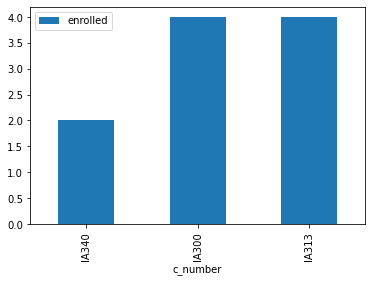

In [30]:
df = pandas.read_sql_query(sql_stat,conn)
df.plot.bar(x='c_number',y='enrolled')

# Q4 

In [38]:
sql_stat = """
            select gp10.professor.p_name,
                count(gp10.course.c_name) as teaching_name
            from gp10.professor
            inner join gp10.course
            on gp10.professor.p_email = gp10.course.p_email
            group by professor.p_name
            order by teaching_name desc 
"""

<AxesSubplot:xlabel='p_name'>

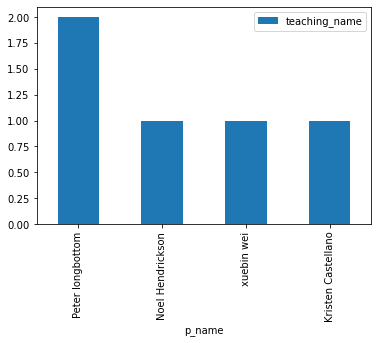

In [39]:
df = pandas.read_sql_query(sql_stat,conn)
df.plot.bar(x='p_name',y='teaching_name')

# Q5

In [45]:
sql_stat = """
            insert into gp10.professor(p_email,p_name,office)
            values ('DoodBob@jmu.edu','Doodle Bob','IA45')
"""

In [50]:
cur.execute(sql_stat)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(DoodBob@jmu.edu) already exists.


In [1]:
sql_stat = """
            insert into gp10.course(c_number,c_name,room,p_email)
            values ('34', 'IA23', 'ISAT67', 'DoodBob@jmu.edu')
"""

In [7]:
conn.rollback()

In [8]:
sql_stat = """
            insert into gp10.professor(p_email,p_name,office)
            values ('DoodBob@jmu.edu','Doodle Bob','IA45')
"""

In [9]:
cur.execute(sql_stat)

In [10]:
conn.commit()

In [11]:
df=pandas.read_sql_query('select * from gp10.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,xuebin wei,hhs112
1,Hendrinx@jmu.edu,Noel Hendrickson,Online
2,Waltontr@jmu.edu,Timothy Walton,ISAT326
3,castelkm@jmu.edu,Kristen Castellano,Keezell408
4,summers@dukes.jmu.edu,Peter longbottom,ISAT
5,DoodBob@jmu.edu,Doodle Bob,IA45


In [31]:
sql_stat = """
            insert into gp10.course(c_number,c_name,room, p_email)
            values ('243', 'Class123', '678' , 'Hendrinx@jmu.edu')
"""

In [32]:
cur.execute(sql_stat)

In [30]:
conn.rollback()

In [33]:
conn.commit()

In [34]:
df=pandas.read_sql_query('select * from gp10.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA340,data mining,ISAT 0336,weixx@jmu.edu
1,IA313,Counter factual reasoning,ENGEO1204,Hendrinx@jmu.edu
2,ENG221\n,English 221,ENGEO2402,castelkm@jmu.edu
3,345,Intro101,ISAT231,summers@dukes.jmu.edu
4,IA300,issues in IA,ISAT150,summers@dukes.jmu.edu
5,243,Class123,678,Hendrinx@jmu.edu


# Q6 

In [38]:
sql_stat= """
            update gp10.course
            set p_email = '{}'
            where p_email = '{}'
""".format('Hendrinx@jmu.edu', 'Classemail')

In [39]:
cur.execute(sql_stat)

In [37]:
conn.rollback()

In [40]:

conn.commit()

In [41]:
df=pandas.read_sql_query('select * from gp10.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA340,data mining,ISAT 0336,weixx@jmu.edu
1,IA313,Counter factual reasoning,ENGEO1204,Hendrinx@jmu.edu
2,ENG221\n,English 221,ENGEO2402,castelkm@jmu.edu
3,345,Intro101,ISAT231,summers@dukes.jmu.edu
4,IA300,issues in IA,ISAT150,summers@dukes.jmu.edu
5,243,Class123,678,Hendrinx@jmu.edu


In [42]:
sql_stat= """
            delete from gp10.professor 
            where p_email='{}'
            """.format('Classemail')

In [43]:

cur.execute(sql_stat)

In [44]:
conn.commit()

In [45]:
df=pandas.read_sql_query('select * from gp10.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,xuebin wei,hhs112
1,Hendrinx@jmu.edu,Noel Hendrickson,Online
2,Waltontr@jmu.edu,Timothy Walton,ISAT326
3,castelkm@jmu.edu,Kristen Castellano,Keezell408
4,summers@dukes.jmu.edu,Peter longbottom,ISAT
5,DoodBob@jmu.edu,Doodle Bob,IA45


In [46]:
cur.close()

In [47]:
conn.close()